# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Joaquín De Groote
- Nombre de alumno 2: Vicente Pinochet R.

### **Link de repositorio de GitHub:** [Insertar Enlace](https://github.com/Qajirr/MDS7202-Labs)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
# Librerias utilizadas
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score


In [3]:
# Carga de datos
df = pd.read_csv(r'stats_players.csv')

In [4]:
df.columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object')

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [5]:
# Crear la columna 'label'
df['label'] = df['National_Position'].notna().astype(int)
# Contar la cantidad de ejemplos por cada clase (0: no seleccionado, 1: seleccionado)
class_counts = df['label'].value_counts()
print(class_counts)

# Variables numéricas
normal_features = ['Height', 'Weight','Age','Aggression', 'Reactions', 'Vision', 'Composure',
                   'Strength', 'Balance', 'Agility', 'Jumping',
                   'Penalties', 'Volleys']
withoutliers_features = ['Ball_Control','Dribbling','Marking','Sliding_Tackle',
                      'Standing_Tackle', 'Interceptions','Crossing',
                        'Short_Pass','Long_Pass', 'Acceleration', 'Speed',
                        'Stamina', 'Heading','Shot_Power','Finishing','Long_Shots',
                        'Curve', 'Freekick_Accuracy']

# Variables categóricas
categorical_features = ['Club_Position', 'Work_Rate','Preffered_Foot','Skill_Moves']

# Creación del ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[
        ('num_normal', StandardScaler(), withoutliers_features),  # Estandarización de variables numéricas
        ('num_nonormal', MinMaxScaler(), normal_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features),
    ])

0    16513
1     1075
Name: label, dtype: int64


Variables Numéricas

Se dividen en dos grupos: aquellas que tienen outliers y aquellas que no.

Variables con outliers (`withoutliers_features`):
- `StandardScaler()`.
    - **Justificación**: La estandarización asegura que los outliers se mantengan dentro de un rango controlado. Este método es adecuado porque en algunos algoritmos (p. ej., SVM, regresión logística), la presencia de outliers puede influir en gran medida los resultados si no se normalizan correctamente. Además, para estos algoritmos, es importante que las características estén en la misma escala.

Variables sin outliers (`normal_features`):

- `MinMaxScaler()`.
    - **Justificación**: El escalado MinMax convierte los valores a un rango específico (por defecto de 0 a 1), manteniendo la relación proporcional entre los valores. Esta técnica es adecuada cuando no hay outliers, porque no distorsiona la distribución de los datos y mantiene las diferencias relativas entre los jugadores, lo cual es útil para ciertos algoritmos como redes neuronales y KNN.

Variables Categóricas

Variables categóricas nominales (`categorical_features`):

- `OneHotEncoder()`.
    - **Justificación**: El `OneHotEncoder` crea una columna binaria (0 o 1) para cada categoría única en estas variables. Esto es esencial para variables nominales, ya que evita asignar un orden arbitrario entre las categorías, lo que podría inducir un sesgo en los modelos de machine learning.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [6]:
# Separar los features y el target (label)
X = df.drop(columns=['label'])
y = df['label']

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

# Verificar distribución de las clases en ambos conjuntos
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.938877
1    0.061123
Name: label, dtype: float64
0    0.938886
1    0.061114
Name: label, dtype: float64


In [7]:
# Pipeline para XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('classifier', XGBClassifier(random_state=99))
])

# Pipeline para LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('classifier', LGBMClassifier(random_state=99))
])

In [8]:
# Entrenar pipeline de XGBoost
pipeline_xgboost.fit(X_train, y_train)

# Entrenar pipeline de LightGBM
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2535
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_normal',
                                                  StandardScaler(),
                                                  ['Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Interceptions', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve',
                                                   'Freekick_Accuracy']),
                                                 ('num_nonormal',
                                                  MinMaxScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Aggression', 'Reactions',
                                                   'Vision', 'Composure',
                                                   'Strength', 'Balance',
                                                   'Agility', 'Jumping',
                                                   'Penalties', 'Volleys']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Club_Position', 'Work_Rate',
                                                   'Preffered_Foot',
                                                   'Skill_Moves'])])),
                ('classifier', LGBMClassifier(random_state=99))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [9]:
# Realizar predicciones en el conjunto de prueba
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Calcular las métricas para XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost, pos_label=1)
recall_xgboost = recall_score(y_test, y_pred_xgboost, pos_label=1)

# Calcular las métricas para LightGBM
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
precision_lightgbm = precision_score(y_test, y_pred_lightgbm, pos_label=1)
recall_lightgbm = recall_score(y_test, y_pred_lightgbm, pos_label=1)

# Mostrar el informe de clasificación
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgboost))
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lightgbm))

# Imprimir métricas para ambos modelos
print(f"XGBoost - Accuracy: {accuracy_xgboost}, Precision: {precision_xgboost}, Recall: {recall_xgboost}")
print(f"LightGBM - Accuracy: {accuracy_lightgbm}, Precision: {precision_lightgbm}, Recall: {recall_lightgbm}")


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.56      0.15      0.24       215

    accuracy                           0.94      3518
   macro avg       0.75      0.57      0.61      3518
weighted avg       0.92      0.94      0.92      3518

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3303
           1       0.53      0.13      0.21       215

    accuracy                           0.94      3518
   macro avg       0.74      0.56      0.59      3518
weighted avg       0.92      0.94      0.92      3518

XGBoost - Accuracy: 0.9408754974417283, Precision: 0.559322033898305, Recall: 0.15348837209302327
LightGBM - Accuracy: 0.9397384877771461, Precision: 0.5283018867924528, Recall: 0.13023255813953488


**Modelos: XGBoost vs LightGBM**

Métrica más adecuada

Las métricas de **precisión** y **recall** son más relevantes que la **accuracy**. Esto es porque la clase positiva (jugadores seleccionados) está significativamente desbalanceada en comparación con la clase negativa (jugadores no seleccionados). Por lo tanto, las métricas de precisión y recall proporcionan un mejor entendimiento del rendimiento del modelo en la identificación de jugadores seleccionados.

- **Recall**: Nos indica la capacidad del modelo para identificar correctamente a los jugadores seleccionados. Un recall bajo significa que muchos jugadores seleccionados no están siendo reconocidos.

- **Precisión**: En este contexto se prioriza menos que el recall. Un modelo con alta precisión pero bajo recall indicaría que está siendo muy conservador en sus predicciones positivas, lo que podría llevar a perder jugadores que deberían ser seleccionados.

Ambos modelos tienen una **accuracy** similar (alrededor del **94%**), pero cuando se observa el recall y la precisión, **XGBoost** supera a **LightGBM** en ambas métricas, aunque ambos presentan un recall relativamente bajo.

**XGBoost** tiene un mejor desempeño.


## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [10]:
# Definir los grupos de posiciones
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

# Función para asignar etiquetas
def assign_label(position):
    if position in ataque:
        return 'ataque'
    elif position in central_ataque:
        return 'central_ataque'
    elif position in central:
        return 'central'
    elif position in central_defensa:
        return 'central_defensa'
    elif position in defensa:
        return 'defensa'
    elif position in arquero:
        return 'arquero'
    else:
        return None

# Crear nuevo dataframe excluyendo 'Sub' y 'Res'
df_new = df[~df['Club_Position'].isin(['Sub', 'Res'])].copy()

# Aplicar la función de etiquetado
df_new['label'] = df_new['Club_Position'].apply(assign_label)

# Eliminar filas donde la etiqueta es None
df_new = df_new.dropna(subset=['label'])

print(df_new['label'].value_counts())



defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: label, dtype: int64


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Identificar columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ])

# Crear el pipeline completo usando ImbPipeline
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(kernel='rbf', random_state=42))
])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenamiento y evaluación con validación cruzada
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Entrenar el modelo final
pipeline.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [47]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import time
from pycaret.classification import ClassificationExperiment
import pandas as pd
import matplotlib.pyplot as plt
# Asumiendo que df_new es tu DataFrame con la columna 'label' ya creada
X = df_new.drop('label', axis=1)
y = df_new['label']



# Asumiendo que df_new es tu DataFrame con la columna 'label' ya creada

# Inicializar el experimento de clasificación
exp = ClassificationExperiment()
exp.setup(data=df_new, target='label', session_id=123, silent=True, 
          verbose=False, fold_strategy='stratified', fold=5)

# Comparar modelos de árbol
tree_models = exp.compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'], 
                                 sort='Precision', n_select=6)

# Mostrar los resultados de la comparación
print(exp.pull())

# Seleccionar el mejor modelo (asumiendo que es el primero en la lista)
best_model = tree_models[0]

# Evaluar el mejor modelo
exp.evaluate_model(best_model)

# Crear el modelo final
final_model = exp.create_model(best_model)

# Obtener la importancia de las características
feature_importance = exp.plot_model(final_model, plot='feature', save=True)

# Mostrar la matriz de confusión
exp.plot_model(final_model, plot='confusion_matrix', save=True)

# Mostrar la curva ROC
exp.plot_model(final_model, plot='auc', save=True)

# Mostrar la curva de aprendizaje
exp.plot_model(final_model, plot='learning', save=True)

plt.show()

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\__init__.py)

In [48]:
from sklearn.utils import _print_elapsed_time

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\__init__.py)

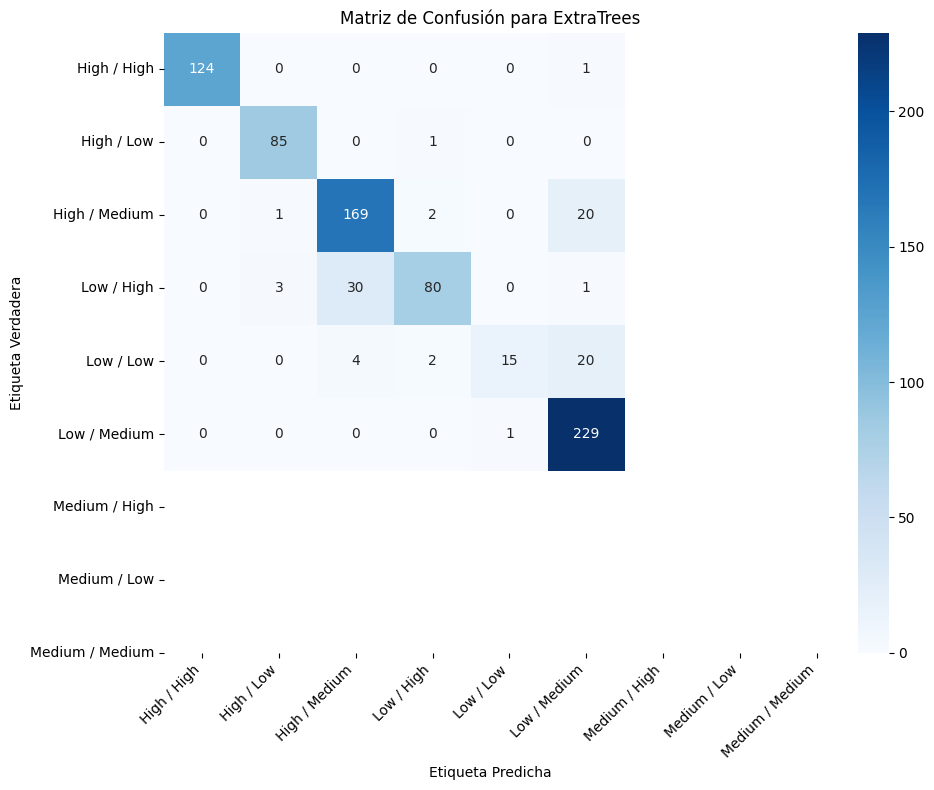

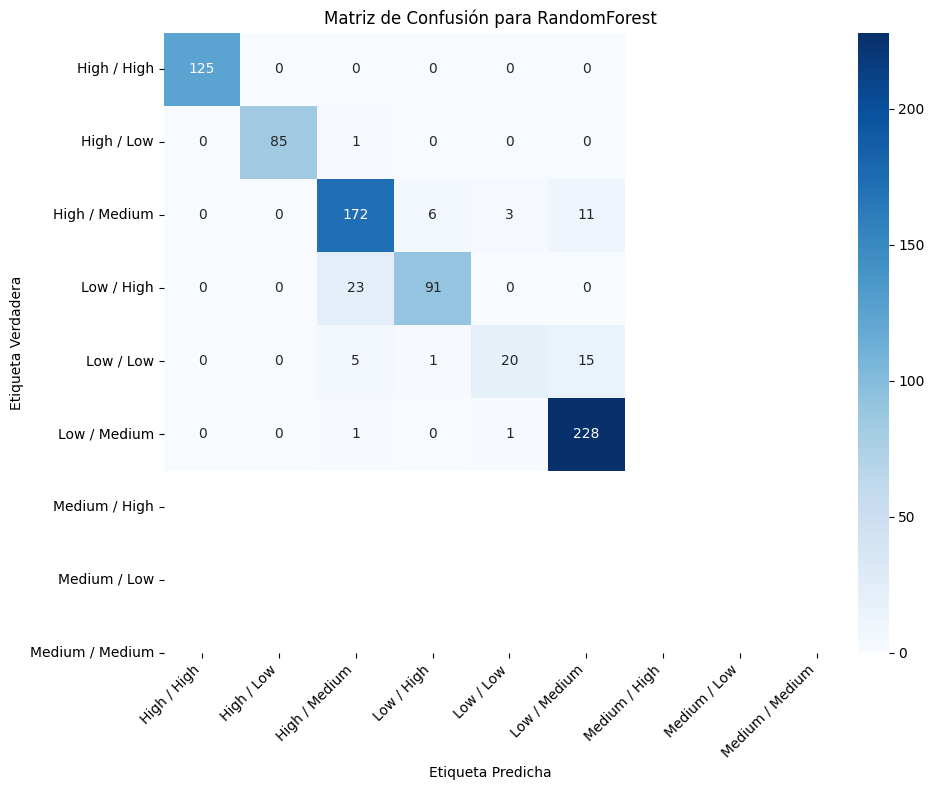

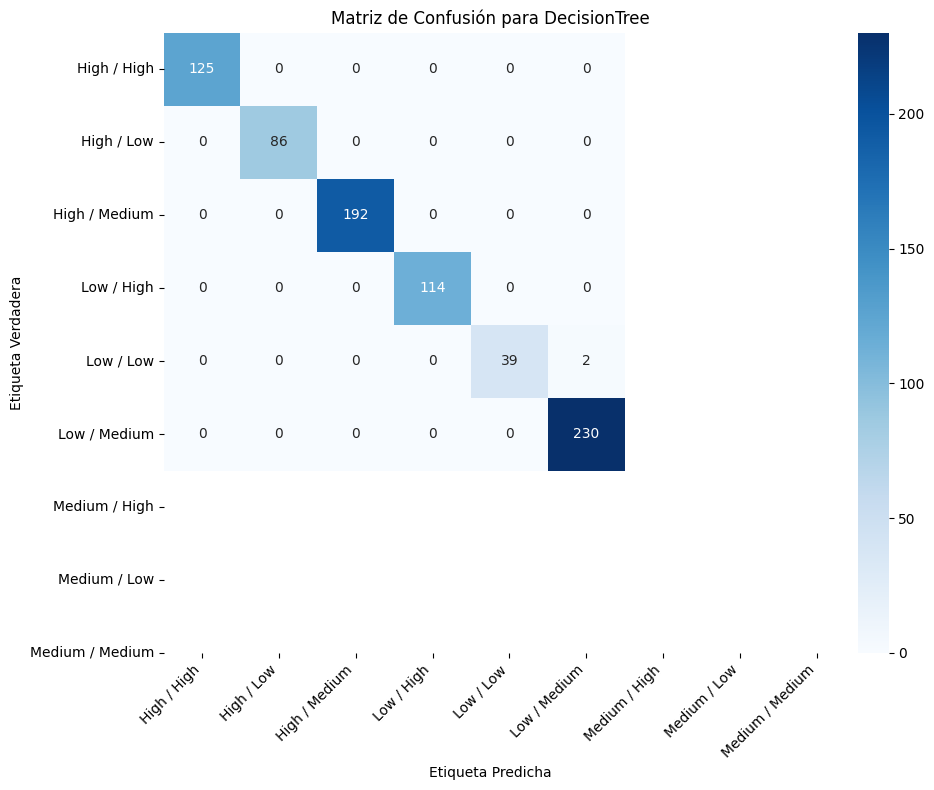

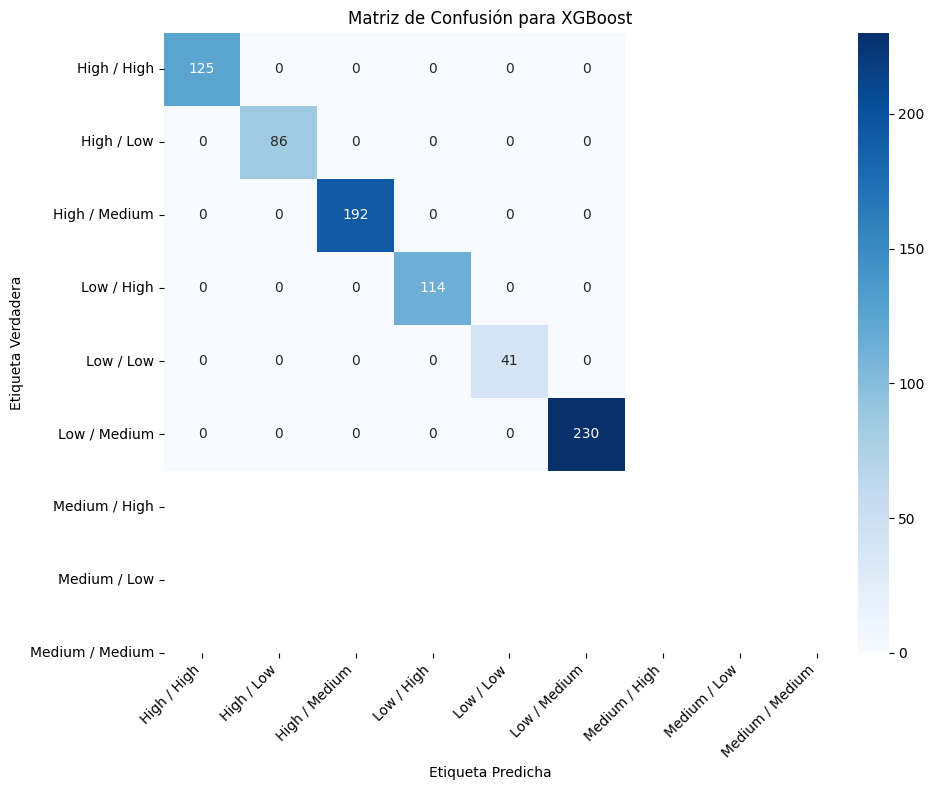

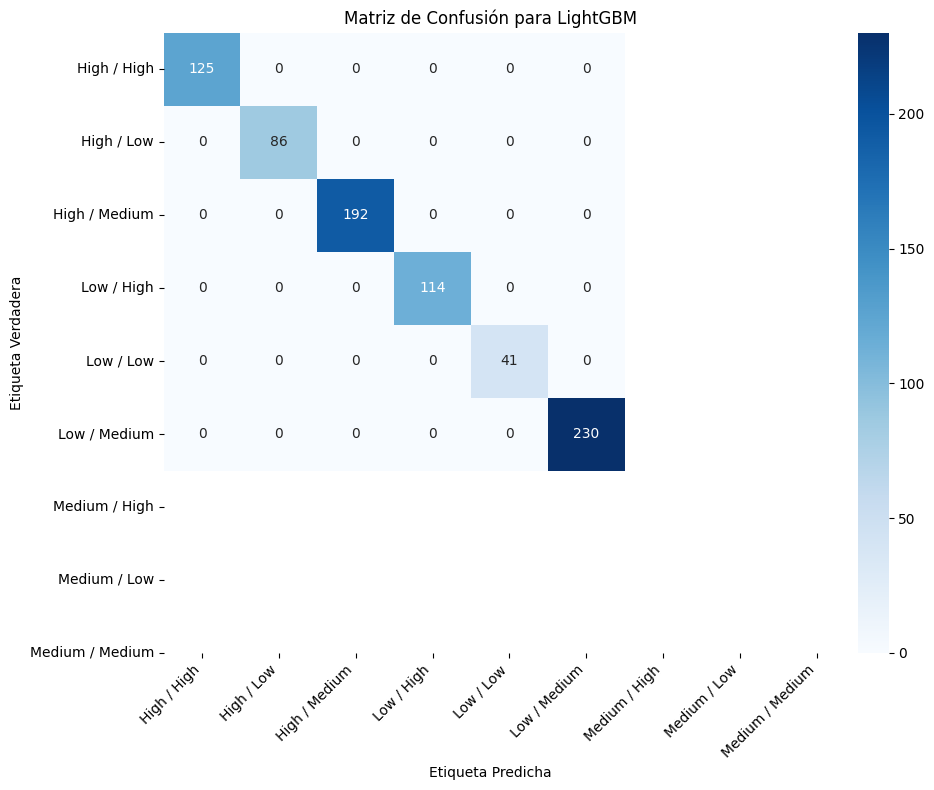

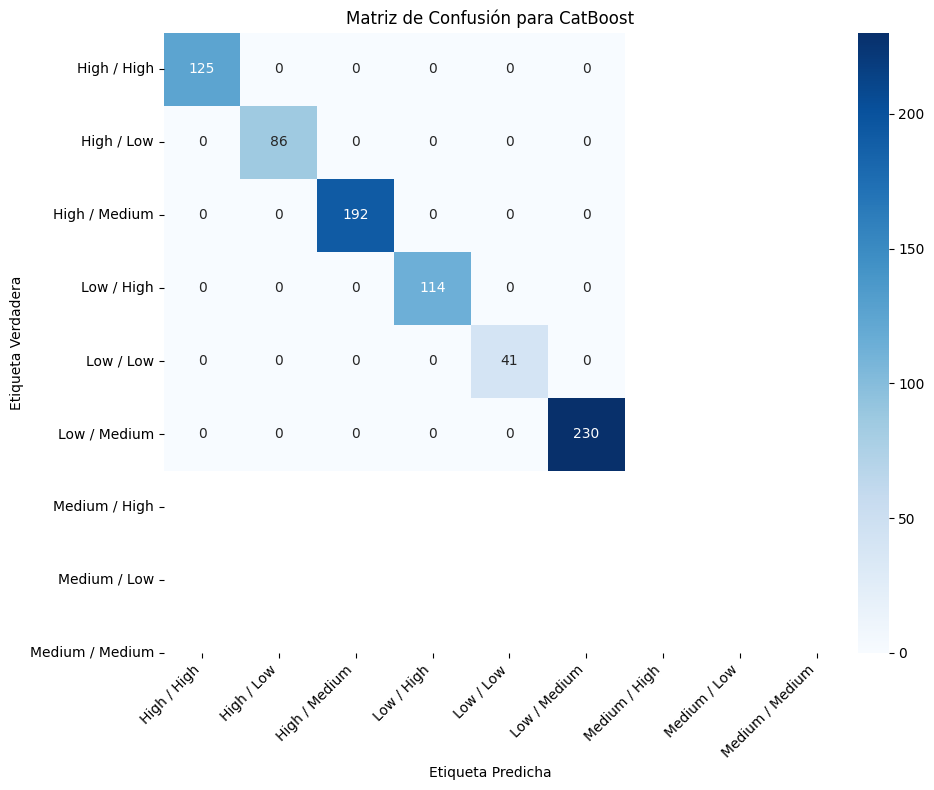


Tasas de Falsos Positivos por Modelo:
ExtraTrees: 0.0815
RandomForest: 0.0815
DecisionTree: 0.0014
XGBoost: 0.0000
LightGBM: 0.0000
CatBoost: 0.0000


In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'models', 'X_test', 'y_test', y 'le' están definidos de la ejecución anterior

def plot_confusion_matrix(model, X_test, y_test, model_name, le):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión para {model_name}')
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    
    # Ajustar las etiquetas
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks + 0.5, le.classes_, rotation=45, ha='right')
    plt.yticks(tick_marks + 0.5, le.classes_, rotation=0)
    
    plt.tight_layout()
    plt.show()

# Generar y mostrar matrices de confusión para cada modelo
for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name, le)

# Calcular y mostrar tasas de falsos positivos
print("\nTasas de Falsos Positivos por Modelo:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fp = cm.sum(axis=0) - np.diag(cm)
    total = cm.sum(axis=0)
    fp_rate = fp / total
    print(f"{name}: {fp_rate.mean():.4f}")

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**